# Text Analysis Using "In the Name of People"(<人民的名义>) and Jieba

# Introduction
“In the Name of People” is a popular Chinese TV series boardcast in 2017. In BBC's report, "In The Name of the People" chronicles the internal power struggle of the Chinese Communist Party in the fictional city of Jingzhou, featuring stories about Chinese politics that are often talked about but never seen on mainstream television.


In the show, local government leaders try to sabotage a top justice's arrest order; laid-off workers hold violent protests against a corrupt deal between the government and a corporation; and fake police drive bulldozers into forced eviction sites.


In this project, I will explore the text of this fiction (Chinese) with Jieba package.  The jieba package could be used to extract, cut, and split Chinese and English. Particularily, it performs pretty well for Chinese text so I chooes Jieba over nltk which is better for analyzing English.

In [1]:
# import packages
import pandas as pd
import jieba
import jieba.analyse
import matplotlib.pyplot as plt
import numpy as np
import chardet
from wordcloud import WordCloud,STOPWORDS

In [2]:
# add character names into jieba dictionary
# it's temporary
jieba.add_word('侯亮平')
jieba.add_word('高育良')
jieba.add_word('祁同伟')
jieba.add_word('陆亦可')
jieba.add_word('李达康')
jieba.add_word('陈岩石')
jieba.add_word('沙瑞金')
jieba.add_word('季昌明')
jieba.add_word('陈海')
jieba.add_word('陈清泉')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\peiyu\AppData\Local\Temp\jieba.cache
Loading model cost 1.599 seconds.
Prefix dict has been built succesfully.


In [3]:
# read txt file
with open('In_the_name_of_people.txt', 'r',encoding='UTF-16') as f:
  word = f.read()
  f.close()
# the default encoding is 'utf-8' but the fiction is not read properly
# you can use the following code to read the fiction and check the type
# with open('In_the_name_of_people.txt', 'rb') as f:
# check encoding type
# type = chardet.detect(word)
# type
# use decode to change text type
# text = word.decode('UTF-16')

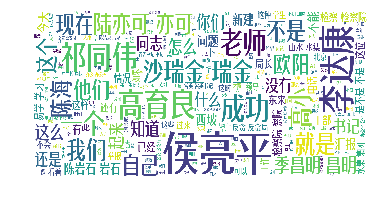

In [4]:
# jieba split words
wordlist = jieba.cut(word, cut_all=True)
wordlist_split = " ".join(wordlist)

# wordcloud
font_path = "shujian.ttf"
my_wordcloud = WordCloud(scale=4, font_path=font_path, background_color='white',
                       max_words=1000, max_font_size=55, random_state=24).generate(wordlist_split)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
my_wordcloud.to_file('result.jpg')

In [5]:
# extract keywords with default idf file
tfidf = jieba.analyse.extract_tags
keywords = tfidf(wordlist_split)
print(keywords)

['侯亮平', '李达康', '高育良', '祁同伟', '沙瑞金', '书记', '瑞金', '陈海', '陆亦可', '老师', '季昌明', '成功', '欧阳', '昌明', '检察', '亦可', '陈岩石', '同志', '不是', '局长']


In [6]:
# extract keywords with textrank
# default: top20, no filter in word type
textrank = jieba.analyse.textrank
keywords_from_textrank = textrank(wordlist_split)
print(keywords_from_textrank)

['书记', '老师', '检察', '没有', '瑞金', '集团', '干部', '知道', '察院', '欧阳', '山水', '同志', '亦可', '工人', '起来', '检察院', '公安', '大风', '学习', '电话']
